In [1]:
# This is my experience of using hmf, the halo mass function calculator nicely published by Steven Murray.
# You should definitely see the webpage https://github.com/steven-murray and https://github.com/steven-murray/hmf

%matplotlib inline

import hmf # you have to install hmf of course.
import numpy as np
from math import *
import matplotlib.pyplot as pyplt

In [2]:
# create a mass funciton object as the default one
default_mf       =      hmf.MassFunction()

# see the documentation of all parameters
# You will find that the parameter `cosmo_params` is the most important parameter controlling the cosmology.
print "#" * 10
print "#", "parameter info:"
default_mf.parameter_info()
print "#" * 10

# see the list of parameters
print "#" * 10
print "#", "parameter names:"
default_mf.get_all_parameter_names()
print "#" * 10

# see the default parameters
print "#" * 10
print "#", "default parameter values:"
default_mf.get_all_parameter_defaults()
print "#" * 10


##########
# parameter info:
Mmax : float
    Maximum mass at which to perform analysis [units :math:`\log_{10}M_\odot h^{-1}`].

growth_params : dict
    Relevant parameters of the :attr:`growth_model`.

Mmin : float
    Minimum mass at which to perform analysis [units :math:`\log_{10}M_\odot h^{-1}`].

growth_model : str or `hmf.growth_factor.GrowthFactor` subclass
    The model to use to calculate the growth function/growth rate.

transfer_model : str or :class:`hmf.transfer_models.TransferComponent` subclass, optional
    Defines which transfer function model to use.
    Built-in available models are found in the :mod:`hmf.transfer_models` module.
    Default is CAMB if installed, otherwise EH.

cosmo_params : dict
    Parameters for the cosmology that deviate from the base cosmology passed.
    This is useful for repeated updates of a single parameter (leaving others
    the same). Default is the empty dict. The parameters passed must match
    the allowed parameters of `cosmo_mod

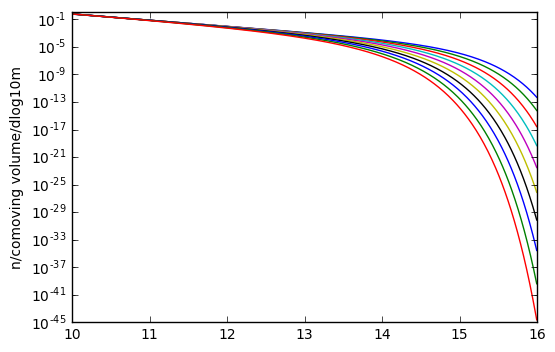

In [ ]:
# we should make plot first
redshifts    =   np.linspace(0.1,2.0,10)
for zs in redshifts:
    # update the mass function to the redshift
    default_mf.update(z = zs, Mmax = 16.0, Mmin = 10.0, dlog10m = 0.01)
    # log10m
    log10m_edges        =   np.arange(10.0, 16.0+0.0001, 0.01)
    log10m_bins         =   0.5 * (log10m_edges[1:] + log10m_edges[:-1])
    pyplt.plot(log10m_bins, default_mf.dndlog10m)
pyplt.yscale("log")
pyplt.ylabel("n/comoving volume/dlog10m")
pyplt.xscale("linear")

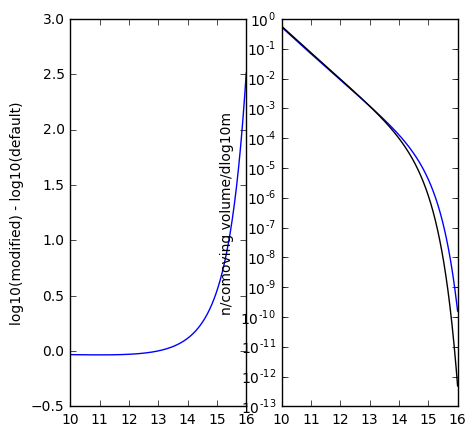

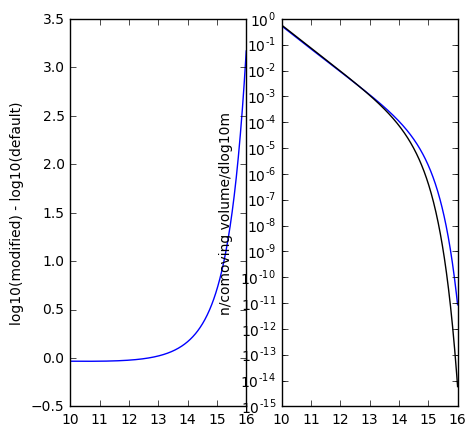

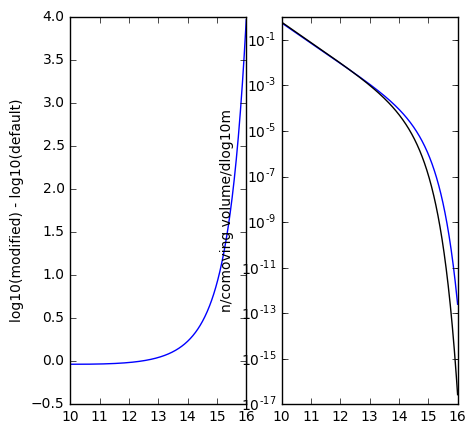

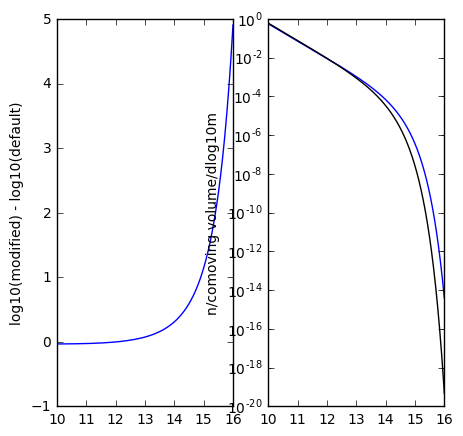

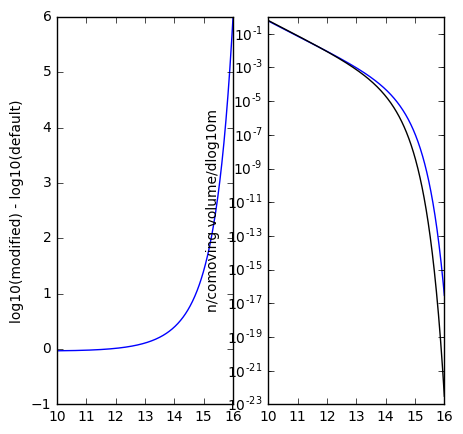

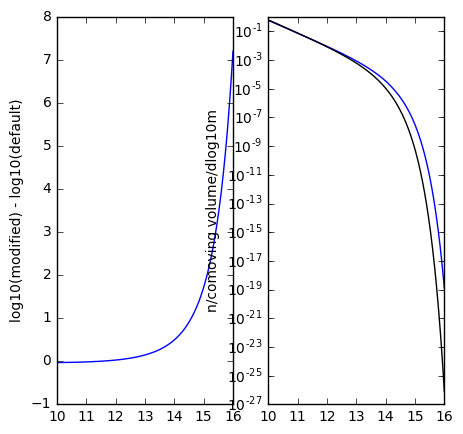

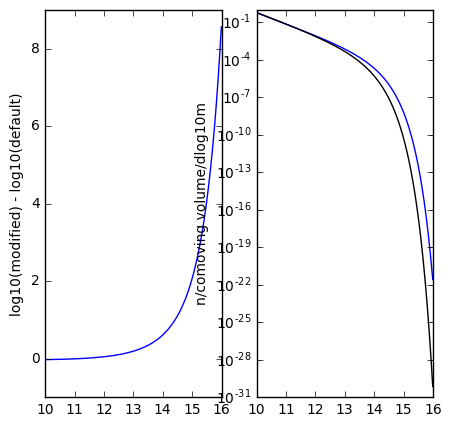

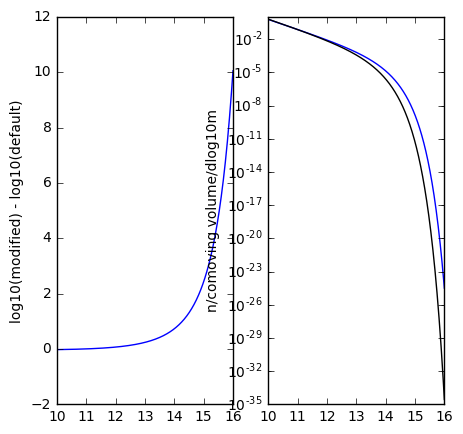

In [ ]:
# Lets build another mass function
mdified_mf     =    hmf.MassFunction()
for zs in redshifts:
    # update the mass function to the redshift
    default_mf.update(z = zs, Mmax = 16.0, Mmin = 10.0, dlog10m = 0.01)
    mdified_mf.update(z = zs, Mmax = 16.0, Mmin = 10.0, dlog10m = 0.01, cosmo_params = {"Om0":0.307, "Ob0":0.0486}, sigma_8 = 1.0)
    # log10m
    log10m_edges        =   np.arange(10.0, 16.0+0.0001, 0.01)
    log10m_bins         =   0.5 * (log10m_edges[1:] + log10m_edges[:-1])
    # plot
    pyplt.figure("diff at z = %s" % zs, figsize = (5.0,5.0))
    pyplt.subplot(121)
    pyplt.plot(log10m_bins, np.log10(mdified_mf.dndlog10m) - np.log10(default_mf.dndlog10m))
    # label
    pyplt.yscale("linear")
    pyplt.ylabel("log10(modified) - log10(default)")
    pyplt.subplot(122)
    pyplt.plot(log10m_bins, mdified_mf.dndlog10m, color = "blue")
    pyplt.plot(log10m_bins, default_mf.dndlog10m, color = "black")
    # label
    pyplt.yscale("log")
    pyplt.ylabel("n/comoving volume/dlog10m")
    pyplt.show()